# Linear Regression

A linear regression is a procedure that allows you to find the linear equation that best represents the relationship between variables. That is, it finds the line (or plane, in higher dimensions) of best fit. For instance, if you want to know how the returns on the S&P 500 (data points $X_1, X_2,\ldots, X_n$) affect the price of a stock ($Y_1, Y_2,\ldots, Y_n$), you can find the line of best fit for the set of points with coordinates (S&P 500 returns, stock price). If this line is, say, $y = 5x + 3$, you know that for every dollar that S&P 500 returns go up, the stock price goes up by \$5. We can also use linear regression for relationships which are not linear, as long as they are linear in the coefficients we're solving for: if we want to fit $y = \beta x^2 + \alpha$ to a data set, we simply square every value of $X$ and then run a linear regression on the resulting observations.

We can quantify "best fit" as the parameters $a, b$ that minimize the sum of squared errors,
$$\sum_{i=1}^n (Y_i - a - bX_i)^2$$
There are other metrics by which to determine the quality of a fit, and so this particular one is referred to as OLS (ordinary least squares) regression.

Python's `statsmodels` library has a built-in linear fit function. It will give a line of best fit, but whether or not the relationship it shows is significant is for you to determine. The output will also have some statistics about the model which may help you quantify how good the fit actually is.

Below we will see an example of two variables $X$ and $Y$ which are completely uncorrelated, and do not have a linear relationship at all.

In [2]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

[2015-06-22 16:54:29.650585] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:54:29.651250] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-22 16:54:29.651774] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:54:29.652341] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-22 16:54:29.653361] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:54:29.653871] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-22 16:54:29.654473] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:54:29.654966] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-22 16:54:29.655448] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:54:29.655933] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07932
Date:                Mon, 22 Jun 2015   Prob (F-statistic):              0.779
Time:                        16:54:29   Log-Likelihood:                -17.872
No. Observations:                 100   AIC:                             39.74
Df Residuals:                      98   BIC:                             44.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5459      0.057      9.553      0.000         0.432     0.659
x1            -0.0279      0.099     -0.282      0.779        -0.224     0.169
==============================================================================
Omnibus:                       32.216   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.287
Skew:                          -0.157   Prob(JB):                       0.0431
Kurtosis:                       1.812   Cond. No.                         4.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

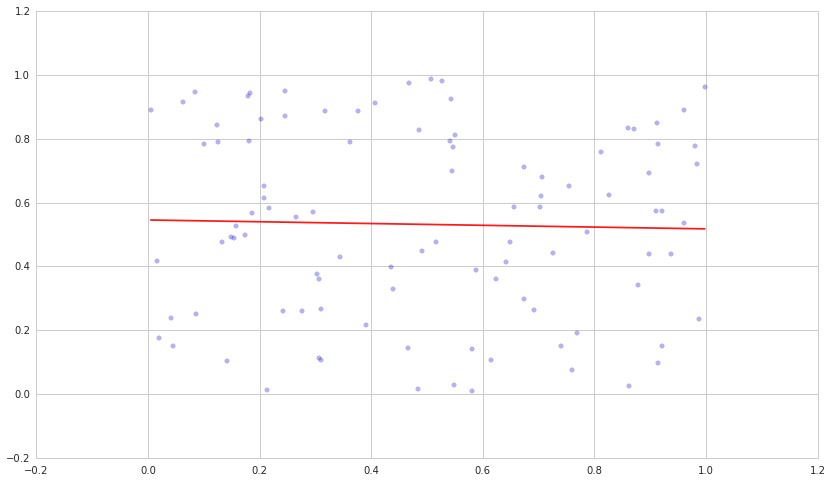

In [6]:
def linreg(X,Y):
    # Running the linear regression
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, x).fit()
    a = model.params[0]
    b = model.params[1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    return model.summary()

xs = np.random.rand(100)
linreg(xs,np.random.rand(100))

The above is clearly not a good representation of the relationship between the variables. Now we can take a look at two variables which we construct to be correlated:

[2015-06-12 16:47:02.005751] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.006523] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:47:02.007050] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.007590] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:47:02.008604] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.009123] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:47:02.009707] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.010199] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:47:02.010728] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:47:02.011338] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     328.8
Date:                Fri, 12 Jun 2015   Prob (F-statistic):           4.46e-33
Time:                        16:47:02   Log-Likelihood:                 26.670
No. Observations:                 100   AIC:                            -49.34
Df Residuals:                      98   BIC:                            -44.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0476      0.035     -1.370      0.174        -0.117     0.021
x1             1.1209      0.062     18.133      0.000         0.998     1.244
==============================================================================
Omnibus:                        3.364   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                2.921
Skew:                           0.321   Prob(JB):                        0.232
Kurtosis:                       2.463   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

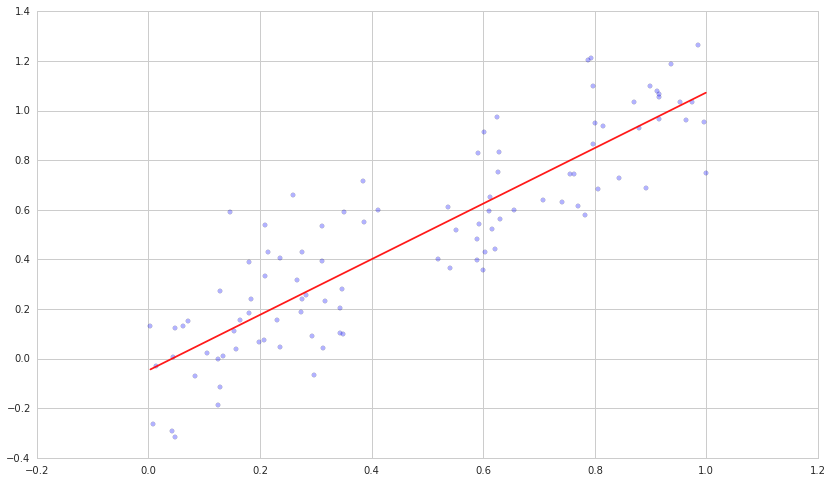

In [18]:
# Generate ys correlated with xs by adding normally-distributed errors
ys = xs + 0.2*np.random.randn(100)

linreg(xs,ys)

In a situation like the above, the line of best fit does indeed model the dependent variable Y quite well (with a high $R^2$ value).

For our last example, we'll compare the price of Tesla Motors stock to the S&P 500:

[2015-06-12 16:43:48.660985] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.661777] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:43:48.662309] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.662885] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:43:48.663902] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.664445] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:43:48.665047] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.665548] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-12 16:43:48.666042] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-12 16:43:48.666571] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     63.14
Date:                Fri, 12 Jun 2015   Prob (F-statistic):           6.66e-14
Time:                        16:43:48   Log-Likelihood:                 548.81
No. Observations:                 251   AIC:                            -1094.
Df Residuals:                     249   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0011      0.002      0.626      0.532        -0.002     0.004
x1             1.9271      0.243      7.946      0.000         1.449     2.405
==============================================================================
Omnibus:                       63.947   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.184
Skew:                           0.850   Prob(JB):                     2.50e-81
Kurtosis:                       8.710   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

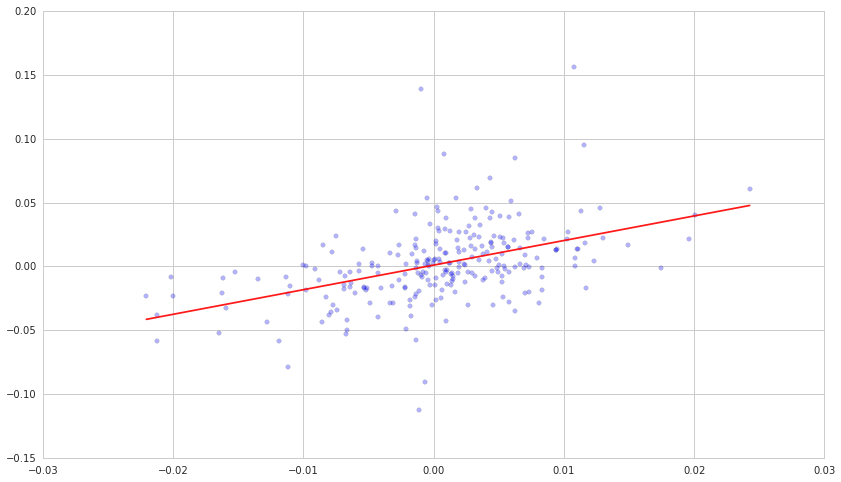

In [14]:
start = '2014-01-01'
end = '2015-01-01'
asset = get_pricing('TSLA', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

# Evaluating and reporting results

The regression model relies on several assumptions:
* The independent variable is not random.
* The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
* The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
* The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. For example, the $R^2$ value tells us the fraction of the total variation of $Y$ that is explained by the model.

When making a prediction based on the model, it's useful to report not only a single value but a confidence interval. We can find the standard error of estimate by getting the `scale` parameter of the model returned by the regression and taking its square root. The formula for standard error of estimate is
$$ s = \left( \frac{\sum_{i=1}^n \epsilon_i^2}{n-2} \right)^{1/2} $$

The variance of the error in our prediction $\hat{Y}$ given the value $X$ is
$$ s_f^2 = s^2 \left( 1 + \frac{1}{n} + \frac{(X - \mu_X)^2}{(n-1)\sigma_X^2} \right) $$

where $\mu_X$ is the mean of our observations of $X$ and $\sigma_X$ is the standard deviation. Then the 95% confidence interval for the prediction is $\hat{Y} \pm t_cs_f$, where $t_c$ is the critical value of the t-statistic for $n$ samples and a desired 95% confidence.